# Iris Classification

## Attribute Information:
* sepal length in cm
* sepal width in cm
* petal length in cm
* petal width in cm
* class: 
  * Iris Setosa (0)
  * Iris Versicolour (1)
  * Iris Virginica (2)

* Missing Attribute Values: None

In [279]:
## Process the features, or X values
iris = datasets.load_iris()
df = pd.DataFrame(iris.data)

In [280]:
## Load all Data into a DataFrame
cols = ['sepal_length', 'sepal_width',  'petal_length',  'petal_width']
df.columns = cols
df['target'] = iris.target
y = iris.target

In [281]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [282]:
df['target'].value_counts()

2    50
1    50
0    50
Name: target, dtype: int64

In [283]:
df['species'] = 'Setosa'
df.loc[df.target == 1, 'species'] = 'Versicolour' 
df.loc[df.target == 2, 'species'] = 'Virginica' 

In [284]:
df['species'].value_counts()

Versicolour    50
Virginica      50
Setosa         50
Name: species, dtype: int64

In [285]:
df.groupby('target').mean()

,sepal_length,sepal_width,petal_length,petal_width
target,,,,
0,5.006,3.428,1.462,0.246
1,5.936,2.770,4.260,1.326
2,6.588,2.974,5.552,2.026


## Breakdown the Data into X and y, and Set up Binary Dependent Variables

In [286]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].copy()

In [287]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(X)

In [288]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers.normalization import BatchNormalization

In [289]:
model = Sequential() #1

model.add(Dense(12, activation='relu', input_dim=4, name='first_hidden')) 
model.add(Dropout(0.2))

# Re-centers the results to insure they dont drift
model.add(BatchNormalization())

# second hidden layer.  Use relu
model.add(Dense(12, activation = 'relu', name='second_hidden'))

# Re-centers the results to insure they dont drift
model.add(BatchNormalization())

# second hidden layer.  Use relu
model.add(Dense(12, activation = 'relu', name='third_hidden'))

# Re-centers the results to insure they dont drift
model.add(BatchNormalization())

model.add(Dropout(0.2))

# output layer: use sigmoid since outputting a probability. Only one node
model.add(Dense(3, activation='softmax', name='output'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
first_hidden (Dense)         (None, 12)                60        
_________________________________________________________________
dropout_20 (Dropout)         (None, 12)                0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 12)                48        
_________________________________________________________________
second_hidden (Dense)        (None, 12)                156       
_________________________________________________________________
batch_normalization_23 (Batc (None, 12)                48        
_________________________________________________________________
third_hidden (Dense)         (None, 12)                156       
_________________________________________________________________
batch_normalization_24 (Batc (None, 12)                48        
__________

In [290]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, \
        random_state = 0)

In [291]:
y_binaries = pd.get_dummies(y_train)

In [292]:
# Compile the model....check for errors
model.compile(loss='categorical_crossentropy', optimizer='adam', \
              metrics=['accuracy', 'mean_squared_error', 'mae'])

In [293]:
# This method will allow us to know how long running the model takes,
# each time it runs.
import datetime
from datetime import timedelta

from IPython.display import Audio
sound_file = 'ring.wav'

def timediff(s1,s2):
    datetimeFormat = '%H:%M:%S'
    diff = datetime.datetime.strptime(str(s2), datetimeFormat)\
        - datetime.datetime.strptime(str(s1), datetimeFormat)
    return diff

In [294]:
s1 = datetime.datetime.now().time().strftime('%H:%M:%S') # START
history = model.fit(X_train, y_binaries, batch_size = 10, epochs = 300, verbose=0)
s2 = datetime.datetime.now().time().strftime('%H:%M:%S') # FINISH
print("\n\nElapsed time (HH:MM:SS): ", timediff(s1,s2))

Audio(sound_file, autoplay=True)



Elapsed time (HH:MM:SS):  0:00:13


In [295]:
pred_classes_train = model.predict_classes(X_train)

In [296]:
# results = pd.DataFrame()
# results = pd.DataFrame(pred_classes_train, columns=['pred_classes'])
# results['actual'] = y_train.sum(axis=1)

In [297]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,pred_classes_train)

array([[39,  0,  0],
       [ 0, 36,  1],
       [ 0,  1, 43]], dtype=int64)

In [298]:
pred_classes = model.predict_classes(X_test)

In [299]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred_classes)

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

In [300]:
print(classification_report(y_train, pred_classes_train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        39
           1       0.97      0.97      0.97        37
           2       0.98      0.98      0.98        44

   micro avg       0.98      0.98      0.98       120
   macro avg       0.98      0.98      0.98       120
weighted avg       0.98      0.98      0.98       120



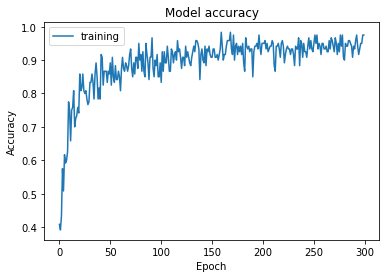

In [301]:
plt.plot(history.history['acc'], label='training')
# plt.plot(history.history['val_acc'], label='testing')
plt.title('Model accuracy')
plt.legend()
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

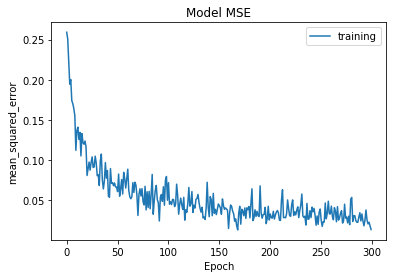

In [302]:
plt.plot(history.history['mean_squared_error'], label='training')
# plt.plot(history.history['val_mean_squared_error'], label='testing')
plt.title('Model MSE')
plt.legend()
plt.ylabel('mean_squared_error')
plt.xlabel('Epoch')
plt.show()

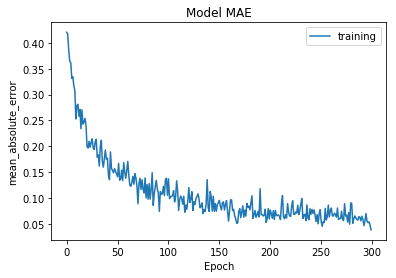

In [303]:
plt.plot(history.history['mean_absolute_error'], label='training')
# plt.plot(history.history['val_mean_absolute_error'], label='testing')
plt.title('Model MAE')
plt.legend()
plt.ylabel('mean_absolute_error')
plt.xlabel('Epoch')
plt.show()

### Predicting a Single Iris

In [304]:
features.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [305]:
df.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width,target
species,,,,,
Setosa,5.006,3.428,1.462,0.246,0
Versicolour,5.936,2.770,4.260,1.326,1
Virginica,6.588,2.974,5.552,2.026,2


## What If We Find a New Iris?
As I illustrated in an earlier notebook, you can now use your model to predict the species, given a new iris.  The above data give us an idea of how the species breakdown.  Setosa irises have much smaller petal_lengths and widths, with Virginica irises being the largest.  Let's try a few and see how our model does. 

Since our model used standardize data, we have to use our StandardScaler object to normal the inputs.  Then we can use the built-in prediction functions to have our model give us a prediction.

In [310]:
# Two new irises....need all four features:
new_data = sc.transform([[5.0, 3.5, 1.5, 0.25], [6.25, 2.8, 4.8, 1.75]])

For the first set of data, I purposely used values that are close to the means for Setosa.  For the second, I used values that are between Versicolor and Virginica.  I expect the model to be very confident for the first, but less so for the second.

In [311]:
prob_prediction = model.predict_proba(new_data)
prob_prediction

array([[9.9728322e-01, 8.7203068e-04, 1.8446977e-03],
       [7.4504630e-04, 3.3778498e-01, 6.6147000e-01]], dtype=float32)

The above results are in scientific notation (and will likely be slightly different than the values below, because of the random nature of networks).  But this is my interpretation of the above values:
* For data set one, the probabilities are 99.7\%, 0.087\%, and 0.18\%.  The results clearly favor Setosa, since it is the first iris.
* For data set two, the probabilities are 0.74\%, 33.8\%, and 66.1\%.  The results favor Virginica by a 2:1 margin, but they are not nearly as definitive as data set 1, as we expected.

Although we know the outcomes, we can also have the network predict the class:

In [312]:
class_prediction = model.predict_classes(new_data)
class_prediction

array([0, 2], dtype=int64)